<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/SPREAD_PETR%2C_BBDC_e_CMIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instalando e importando libs**

In [ ]:
!pip install yfinance
import yfinance as yf
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 9.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

## **Obtendo dados dos ativos**

Primeiro para PETR3 & PETR4

In [ ]:
ativos = ['PETR3', 'PETR4']

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
ativos

['PETR3.SA', 'PETR4.SA']

In [ ]:
cotacoes = yf.download(ativos, start = '2010-01-01', end = '2023-01-24').Close

[*********************100%***********************]  2 of 2 completed


In [ ]:
cotacoes.head()

,PETR3.SA,PETR4.SA
Date,,
2010-01-04 00:00:00-02:00,41.650002,37.320000
2010-01-05 00:00:00-02:00,41.400002,37.000000
2010-01-06 00:00:00-02:00,41.810001,37.500000
2010-01-07 00:00:00-02:00,41.560001,37.150002
2010-01-08 00:00:00-02:00,41.250000,36.950001


In [ ]:
long_short = cotacoes['PETR4.SA']/cotacoes['PETR3.SA']

In [ ]:
long_short.head()

Date
2010-01-04 00:00:00-02:00    0.896038
2010-01-05 00:00:00-02:00    0.893720
2010-01-06 00:00:00-02:00    0.896915
2010-01-07 00:00:00-02:00    0.893888
2010-01-08 00:00:00-02:00    0.895758
dtype: float64

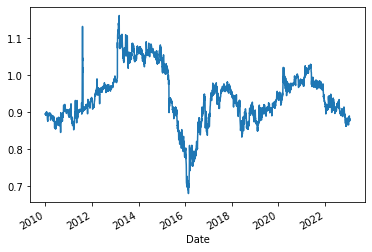

In [ ]:
long_short.plot()

In [ ]:
fig = px.line(x=long_short.index, y=long_short)

fig.add_hline(y=long_short.mean(), line_width=5, line_color="green")
fig.add_hline(y=(long_short.mean()-long_short.std()), line_width=3, 
              line_dash="dash", line_color="orange")
fig.add_hline(y=(long_short.mean()+long_short.std()), line_width=3, 
              line_dash="dash", line_color="orange")
fig.add_hline(y=(long_short.mean()-2*long_short.std()), line_width=5, 
              line_dash="dash", line_color="red")
fig.add_hline(y=(long_short.mean()+2*long_short.std()), line_width=5, 
              line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, 
                  title_text='Razão entre preço PETR4 e PETR3 (2010 e Jan/2023)'

,template = 'simple_white',width=500,height=500)

fig.show()

In [ ]:
bbdc4 = inv.get_stock_historical_data('BBDC4', country='brazil', from_date='01/01/2000', 
                                      to_date='09/09/2022')
bbdc3 = inv.get_stock_historical_data('BBDC3', country='brazil', from_date='01/01/2000', 
                                      to_date='09/09/2022')

long_short = bbdc4.Close/bbdc3.Close

fig = px.line(x=long_short.index, y=long_short)

fig.add_hline(y=long_short.mean(), line_width=5, line_color="green")

fig.add_hline(y=(long_short.mean()-long_short.std()), line_width=3,line_dash="dash", line_color="orange")

fig.add_hline(y=(long_short.mean()+long_short.std()), line_width=3,line_dash="dash", line_color="orange")

fig.add_hline(y=(long_short.mean()-2*long_short.std()), line_width=5, line_dash="dash", line_color="red")

fig.add_hline(y=(long_short.mean()+2*long_short.std()), line_width=5, line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, 
                  title_text='Razão entre preço BBDC4/BBDC3 (2000 e set/2022)',
                  template = 'simple_white',width=700,height=300)
fig.show()

In [ ]:

cmig4 = inv.get_stock_historical_data('CMIG4', country='brazil', from_date='01/01/2000', 
                                      to_date='09/09/2022')
cmig3 = inv.get_stock_historical_data('CMIG3', country='brazil', from_date='01/01/2000', 
                                      to_date='09/09/2022')

long_short = cmig4.Close/cmig3.Close

fig = px.line(x=long_short.index, y=long_short)

fig.add_hline(y=long_short.mean(), line_width=5, line_color="green")
fig.add_hline(y=(long_short.mean()-long_short.std()), line_width=3, 
              line_dash="dash", line_color="orange")
fig.add_hline(y=(long_short.mean()+long_short.std()), line_width=3, 
              line_dash="dash", line_color="orange")
fig.add_hline(y=(long_short.mean()-2*long_short.std()), line_width=5, 
              line_dash="dash", line_color="red")
fig.add_hline(y=(long_short.mean()+2*long_short.std()), line_width=5, 
              line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, 
                  title_text='Razão entre preço CMIG4/CMIG3 (2000 e set/2022)',
                  template = 'simple_white',width=500,height=500)
fig.show()